<img src="IMG/logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales - Segundo Cuatrimestre 2025

# Trabajo Práctico Nº0: Primeros pasos en la simulación
#### Matías Cassino

# Consignas

En este primer trabajo comenzaremos por diseñar un generador de señales que utilizaremos en las primeras simulaciones que hagamos.
1) La primer tarea consistirá en programar una función que genere señales senoidales y que permita parametrizar:
vmax = la amplitud máxima de la senoidal (volts)
- dc = su valor medio (volts)
- ff = la frecuencia (Hz)
- ph = la fase (radianes)
- nn = la cantidad de muestras digitalizada por el ADC (# muestras)
- fs = la frecuencia de muestreo del ADC.
es decir que la función que uds armen debería admitir se llamada de la siguiente manera

tt, xx = mi_funcion_sen( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)

Recuerden que tanto xx como tt deben ser vectores de Nx1. Puede resultarte útil el módulo de visualización
matplotlib.pyplot donde encontrarán todas las funciones de visualización estilo Matlab.

Bonus: 
Realizar los experimentos que se comentaron en clase. 

2.A) Siguiendo la notación de la función definida más arriba:

    I) ff = 500 Hz
    II) ff = 999 Hz
    III) ff = 1001 Hz
    IV) ff = 2001 Hz
    
2.B) Implementar alguna otra señal propia de un generador de señales. 

# Introducción
En este trabajo se desarrollaron dos funciones las cuales generan una señal senoidal y otra triangular en función de la cantidad de muestras, la frecuencia de muestreo, la frecuencia de la señal, la fase, la amplitud y la componente contínua. Posteriormente, por un lado, se analizó el efecto gráfico de alterar la frecuencia de la señal, y, por otro lado, el ajuste de los demás parámetros.

# Desarrollo experimental

In [1]:
#%% Modulos
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pdsmodulos as pds
from scipy import signal

# Senoidal
def mi_funcion_sen( vmax, dc, ff, ph, nn, fs):
    # Datos generales de la simulación
    ts = 1/fs # tiempo de muestreo
    tt = np.linspace(0, (N-1)*ts, N).flatten() # grilla de sampleo temporal
    arg = 2*np.pi*ff*tt + ph # argumento
    xx = vmax*(np.sin(arg) + dc).flatten() # señal
    
    #%% Presentación gráfica de los resultados
    plt.figure()
    plt.plot(tt, xx, label=f'f= {ff}Hz')
    plt.title('Señal: senoidal')
    plt.xlabel('tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.grid()
    plt.legend()
    plt.show() 
    
    return tt,xx

# Triangular
def mi_funcion_triangular( vmax, dc, ff, ph, nn, fs):
    # Datos generales de la simulación
    ts = 1/fs # tiempo de muestreo
    tt_aux = np.linspace(0, (N-1)*ts, N).flatten() # grilla de sampleo temporal
    arg = 2*np.pi*ff*tt_aux + ph # argumento
    xx_aux = vmax*(signal.sawtooth(arg) + dc).flatten() # señal
    
    #%% Presentación gráfica de los resultados
    plt.figure()
    plt.plot(tt_aux, xx_aux, label=f'f= {ff}Hz')
    plt.title('Señal: triangular')
    plt.xlabel('tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.grid()
    plt.legend()
    plt.show() 
    
    return tt_aux,xx_aux

#%% Parámetros
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

# Análisis de resultados

1. 

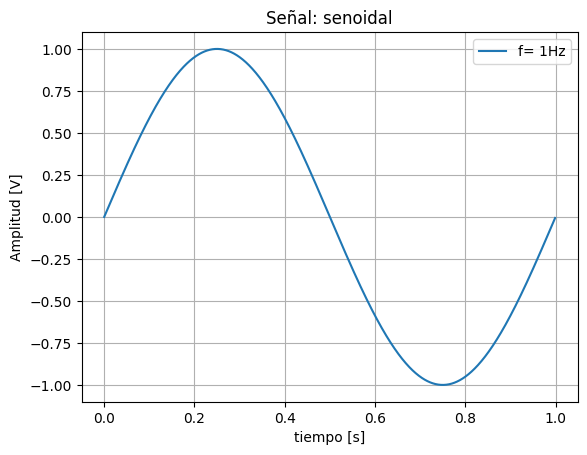

In [2]:
#%% Invocación de la función para la señal senoidal
tt,xx = mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph=0, nn=N,fs=fs)

- La señal posee una amplitud de módulo unitario y desfase nulo. Además, se representa óptimamente con 1000 muestras por ciclo.

2.

2.A

In [3]:
#%% Invocación de la función para la señal senoidal con distintas frecuencias

I)

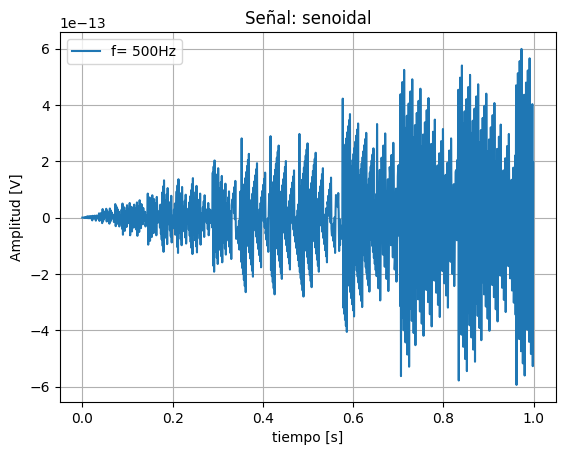

In [4]:
tt,xx = mi_funcion_sen(vmax = 1, dc = 0, ff = 500, ph=0, nn=N,fs=fs)

- La señal se distorsiona ya que se representa con 2 muestras por ciclo los ceros interpolados con funciones lineales, lo cual es suficiente teóricamente según el teorema de Nyquist al alcanzar el caso límite. Sin embargo, en la práctica se evidencia que la frecuencia de la señal (ff) debe ser menor al cociente de la frecuencia de muestreo (fs) entre 2 para así evitar redundancia y poder analizar.

II)

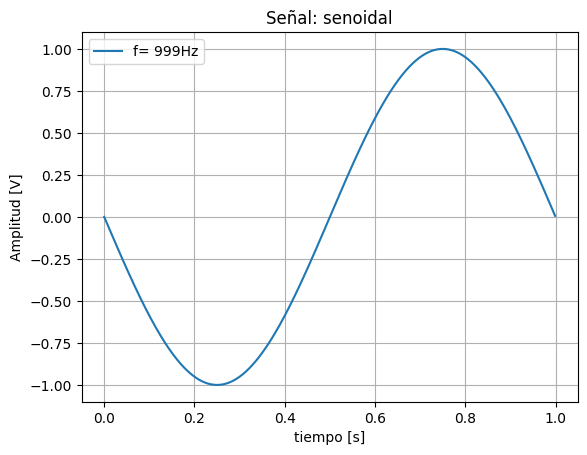

In [5]:
tt,xx = mi_funcion_sen(vmax = 1, dc = 0, ff = 999, ph=0, nn=N,fs=fs)

- La forma de onda temporal es idéntica a la señal con frecuencia 1 Hz pero invertida, es decir, con un desfasaje de pi, debido a que se refleja en el intervalo de frecuencias (0;fs/2), es decir, genera aliasing.

III)

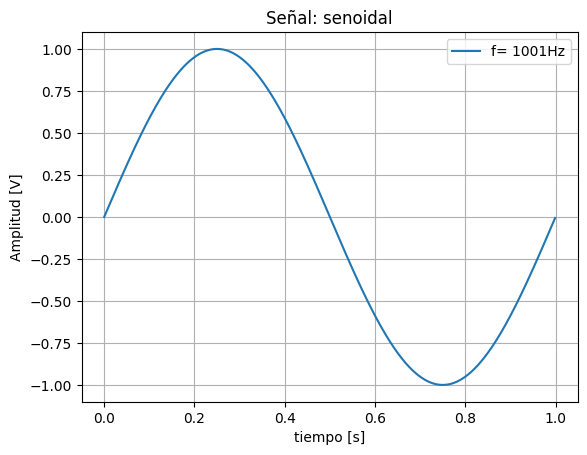

In [6]:
tt,xx = mi_funcion_sen(vmax = 1, dc = 0, ff = 1001, ph=0, nn=N,fs=fs)

- La serie temporal es equivalente a la forma de onda definida por la señal con frecuencia 1 Hz debido a la periodicidad.

IV)

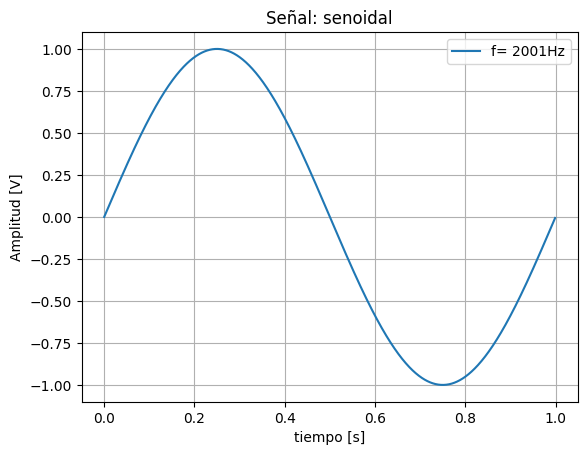

In [7]:
tt,xx = mi_funcion_sen(vmax = 1, dc = 0, ff = 2001, ph=0, nn=N,fs=fs)

- Idem III.

2.B

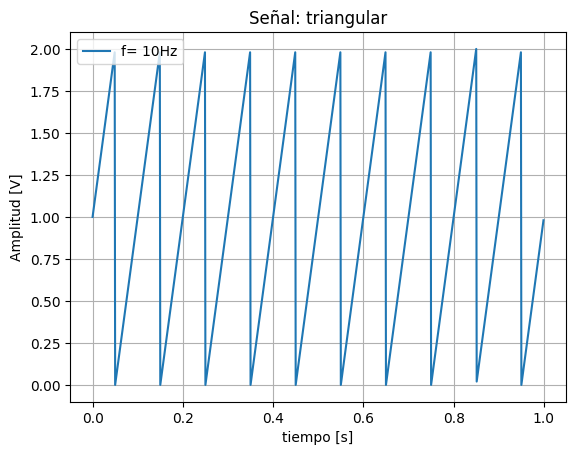

In [8]:
#%% Invocación de la función para la señal triangular con distintos parámetros
tt_aux,xx_aux = mi_funcion_triangular(vmax = 1, dc = 1, ff = 10, ph=np.pi, nn=N,fs=fs)

- La señal triangular se graficó con frecuencia de 10 Hz, fase de magnitud pi, componente contínua de valor 1 y los demás parámetros previamente establecidos. Por lo tanto, se representa con 100 muestras por ciclo, se desplaza verticalmente, cambian sus ceros a diferencia de la misma señal con con fase nula y no se distorsiona.

# Conclusiones
Finalmente, se comprendió el efecto de perturbar la frecuencia de la señal en su representación temporal dado que, paralelamente, se altera la cantidad de muestras por ciclo. Además, esto último puede conllevar la distorsión de la señal y, por ende, no estar bien definida al incumplir el teorema de Nyquist. En adición, la periodicidad de la señal resultó en representaciones idénticas para ciertas frecuencias, las frecuencias superiores a Nyquist y menores al primer período en fs derivó en el reflejo desfasado de la señal, y la modificación de los parámetros correspondientes a la señal triangular permitió analizar sus consecuencias gráficas.

# Autoevaluación
A) Resolví la tarea con seguridad.

B) Logré comprender los efectos de ajustar la frecuencia de la señal y la incidencia de los parámetros tales como la amplitud, la fase y la componente continua.

C) No usé IA.